### 24787 Homework-1 Problem-1(b)

In [ ]:
#24787 Homework-1 Problem-1(b)

import numpy as np

#Ask for how many coordinates to expect
n = int(input("How many coordinates: "))    

#Initializes matrices in the correct shape and prefills them with 1's
matX = np.ones([n,2])
matY = np.ones([n])

#Inputs the coordinates in correct format to a matrix
for i in range(n):
    print("Define point #",i+1)
    matX[i][1] = input("Enter the X coordinate: ")
    matY[i] = input("Enter the Y coordinate: ")

matY = np.transpose(matY)


#Solving the normal equation
mat2 = np.dot(np.transpose(matX), matX)
try:
    mat3 = np.linalg.inv(mat2)
except:
    print("These set of points renders a matrix which is non-invertible. Please reduce the number of features or try again for new values.")
mat4 = np.dot(np.dot(mat3, np.transpose(matX)),matY)


print(matX)
print(matY)

#Printing the result
print("Theta_0 = ", mat4[0])
print("Theta_1 = ", mat4[1])
print("y = ", mat4[0]," + (x * ",mat4[1],")")


How many coordinates: 5
Define point # 1
Enter the X coordinate: -2
Enter the Y coordinate: 2
Define point # 2
Enter the X coordinate: 2
Enter the Y coordinate: 4
Define point # 3
Enter the X coordinate: 3
Enter the Y coordinate: 8
Define point # 4
Enter the X coordinate: 5
Enter the Y coordinate: 11
Define point # 5
Enter the X coordinate: 4
Enter the Y coordinate: 17
[[ 1. -2.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  5.]
 [ 1.  4.]]
[ 2.  4.  8. 11. 17.]
Theta_0 =  4.273972602739728
Theta_1 =  1.7191780821917801
y =  4.273972602739728  + (x *  1.7191780821917801 )


### 24787 Homework-1 Problem-1(c)

In [ ]:
#24787 Homework-1 Problem-1(c)

import csv
import numpy as np

#Import file without pandas
file = open("data.csv")
reader = csv.reader(file, delimiter=",")
lines= list(reader)


#Initializes matrices in the correct shape and prefills them with 1's
n = len(lines)
matX = np.ones([n-1,2])
matY = np.ones([n-1])


#Inputs the coordinates in correct format to a matrix
for i in range(1,n):
    matX[i-1][1] = float(lines[i][0])
    matY[i-1] = float(lines[i][1])
matY = np.transpose(matY)


#Solving the normal equation
mat2 = np.dot(np.transpose(matX), matX)
mat3 = np.linalg.inv(mat2)
mat4 = np.dot(np.dot(mat3, np.transpose(matX)),matY)

print("Theta_0 = ", mat4[0])
print("Theta_1 = ", mat4[1])
print("y = ", mat4[0]," + (x * ",mat4[1],")")


Theta_0 =  4.080657141894995
Theta_1 =  -0.4423691385043128
y =  4.080657141894995  + (x *  -0.4423691385043128 )


### 24787 Homework-1 Problem-2(a)


In [ ]:
#24787 Homework-1 Problem-2(a)

def includes(item, val, start_ind = None):
    if (start_ind == None):
        start_ind = 1
   
    check = 0
    
    if (isinstance(item, dict) == True):
        for i in item:
            if(str(item[i]) == str(val)):
                check = 1
                break
        
    else:  
        for i in range(start_ind-1,len(item)):
            if (item[i] == val):
                check = 1
                break
        
    if (check == 1):
        print("True")
    else: print("False")
   

In [ ]:
includes([2,3,4],2,0)
includes([2,3,4],4,1)
includes({'a':1,'b':2}, 1)
includes({'a':1,'b':2}, 'a')
includes('abcd','b')

True
True
True
False
True


###  24787 Homework-1 Problem-2(b)

In [ ]:
#24787 Homework-1 Problem-2(b)
#Method 1: Simpler implementation but wasnt sure if a global list can be defined in the homework

l = []  #Global list

def moving_average(val=None):
    if val == None:
        return ("No value entered")    #Taking care of edge cases
    else:
        l.append(val)    #Append new input 
        avg = sum(l)/len(l)
        return (round(avg,1))

In [ ]:
mAvg = moving_average()
print(mAvg(10))
print(mAvg(11))
print(mAvg(12))

[10]
10.0
[10, 11]
10.5
[10, 11, 12]
11.0


In [ ]:
#24787 Homework-1 Problem-2(b)
#Method 2: Doesnt need a global list to be defined

def moving_average():
    
    #Initializes empty list
    l =[]
    
    def m_avg(m=None):
        
        #If no value is entered, return the current moving average
        if m==None:
            return (sum(l)/len(l))
        
        #If a new value is entered, store it and print the moving average
        elif type(m) == int:
            l.append(m)
            print(l)
            moving_avg = sum(l)/(len(l))
            return (moving_avg)
        
    return (m_avg)

In [ ]:
mAvg = moving_average()
print(mAvg(10))
print(mAvg(11))
print(mAvg(12))

[10]
10.0
[10, 11]
10.5
[10, 11, 12]
11.0


### 24787 Homework-1 Problem-2(c)

In [ ]:
#24787 Homework-1 Problem-2(c)


def same_frequency(num1, num2):
    
    #Initialize 2 dictionaries (this is a better method than converting to strings)
    dict1 = {}
    dict2 = {}
    
    #Populate the first dictionary
    while (num1 != 0):
        digit = str(num1%10)    #Extracts the last digit of the number
        num1 = int(num1/10)     #Removes the last digit of the number
        try:                
            dict1[digit] +=1    #If the number is present already, the value will exist, and be updated
        except:                 #If the key value pair doesnt exist in the previous line, it would have generated a traceback which is now caught by the try-except
            dict1[digit]  =1    #If the number is not present already, a new key-value pair will be registered
    
    #Populate the second dictionary
    while (num2 != 0):
        digit = str(num2%10)
        num2 = int(num2/10)
        try:
            dict2[digit] +=1
        except:
            dict2[digit]  =1
    
    #Even though dictionaries are not ordered data structures, python allows the user to directly compare two dictionaries with an operator
    if (dict1 == dict2):
        print('True')
    else:
        print('False')
    

In [ ]:
#Calling the function to test Homework-1 Problem-2(c)

same_frequency(551122, 221515)
same_frequency(321142, 3212215)
same_frequency(12345, 31354)
same_frequency(1212, 2211)

True
False
False
True


### 24787 Homework-1 Problem-2(d)


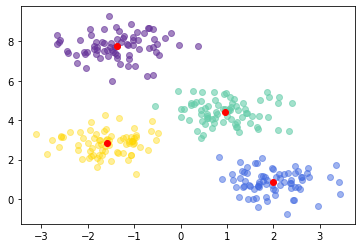

In [ ]:
#24787 Homework-1 Problem-2(d)

from numpy import load
import matplotlib.pyplot as plt

#To view/manipulate the files
cluster = load('kmeans.npz')
lst = cluster.files

#Because there are 4 clusters, we plot 4 scatterplots, each of a different color
for i in range(0,len(cluster['data'])):
    if   (cluster['pred'][i]==0):
        plt.plot(cluster['data'][i][0],cluster['data'][i][1],'o',color='rebeccapurple', alpha=0.6)
    elif (cluster['pred'][i]==1):
        plt.plot(cluster['data'][i][0],cluster['data'][i][1],'o',color='royalblue', alpha=0.5)
    elif (cluster['pred'][i]==2):
        plt.plot(cluster['data'][i][0],cluster['data'][i][1],'o',color='mediumaquamarine', alpha=0.6)
    elif (cluster['pred'][i]==3):
        plt.plot(cluster['data'][i][0],cluster['data'][i][1],'o',color='gold', alpha=0.4)

#Plotting the centers of the clusters
for i in range(0,len(cluster['centers'])):
    plt.plot(cluster['centers'][i][0],cluster['centers'][i][1],'o',color='red', alpha=1)


### 24787 Homework-1 Problem-2(e)

In [ ]:
#24787 Homework-1 Problem-2(e)

def NUMPY_outer(X,Y):
    fields = []
    for i in range(len(X)):
        field = []
        for j in range(len(Y)):
            x = X[i]*Y[j]
            field.append(x)
        fields.append(field) 
    return(fields)



In [ ]:
#Testing Homework-1 Problem-2(e)

import numpy as np
np.random.seed(24787)
X = np.random.randint(-1000, 1000, size=3000)
Y = np.random.randint(-1000, 1000, size=3000)

predefined_function = np.outer(X,Y)
userdefined_function = NUMPY_outer(X,Y)

if (np.array_equal(predefined_function, userdefined_function) == True):
    print("Both methods yield the same answer")
else:
    print("Both methods yield different answers")



Implementation is correct


Even though both the functions return the same result, the Numpy method is better because of 3 reasons:

1. The Numpy method uses arrays (which are a collection of of homogeneous data-types that stored in continuous memory locations) wheras our method uses lists (which are heterogeneous)
2. The Numpy package simultaneously computes multiple fragments of the code in parallel
3. The Numpy package integrates C, C++, and Fortran codes in Python and thus has faster execution compared to Python